In [2]:
import pandas as pd


In [3]:
cardio_base = pd.read_csv("cardio_base.csv")
cardio_alco=pd.read_csv("cardio_alco.csv")

In [4]:
cardio_base

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1
69996,99995,22601,1,158,126.0,140,90,2,0
69997,99996,19066,2,183,105.0,180,90,3,0
69998,99998,22431,1,163,72.0,135,80,1,0


calculate age as round down how much heavier is the age grp with heaviest average weight than the age grp with the lowest weight using pandas

In [5]:
cardio_base['age_years'] = (cardio_base['age'] / 365).apply(lambda x: int(x))
avg_weight_by_age = cardio_base.groupby('age_years')['weight'].mean()
heaviest_avg_weight = avg_weight_by_age.max()

lightest_avg_weight = avg_weight_by_age.min()
weight_difference = heaviest_avg_weight - lightest_avg_weight
print(weight_difference)

16.873720760233923


In [6]:
lightest_avg_weight

59.0

do people over 50 have higher cholestrol  levels than rest how to find

In [7]:


# Splitting the data into two groups
over_50 = cardio_base[cardio_base['age_years'] > 50]
under_50 = cardio_base[cardio_base['age_years'] <= 50]

# Calculating average cholesterol levels
avg_cholesterol_over_50 = over_50['cholesterol'].mean()
avg_cholesterol_under_50 = under_50['cholesterol'].mean()

# Comparison
if avg_cholesterol_over_50 > avg_cholesterol_under_50:
    print("People over 50 have higher average cholesterol levels.")
else:
    print("People over 50 do not have higher average cholesterol levels.")


People over 50 have higher average cholesterol levels.


In [8]:
avg_cholesterol_over_50 

1.4313608815426997

In [9]:
difference = avg_cholesterol_over_50 - avg_cholesterol_under_50
# Output the result
print(f"The average cholesterol level for people over 50 is {difference} units higher than for those 50 and under.")

The average cholesterol level for people over 50 is 0.18332027240564375 units higher than for those 50 and under.


How many times more likely are men to be smokers compared to women, according to dataset?

In [22]:
# Define identifiers for gender
male_identifier = 2
female_identifier = 1

# Calculate smoking rates
male_smoking_rate = cardio_base[cardio_base['gender'] == male_identifier]['smoke'].mean()
female_smoking_rate = cardio_base[cardio_base['gender'] == female_identifier]['smoke'].mean()

# Calculate the ratio
if female_smoking_rate > 0:
    smoking_ratio = male_smoking_rate / female_smoking_rate
    print(male_smoking_rate*100)
    print(female_smoking_rate*100)
    print(f"Men are {smoking_ratio:.2f} times more likely to be smokers than women.")
else:
    print("Cannot calculate the ratio as the female smoking rate is 0.")

21.88802615447487
1.7856358444981333
Men are 12.26 times more likely to be smokers than women.


how tall are  the tallest 1% of people?

In [23]:
# Calculate the 99th percentile of height
tallest_1_percent_height = cardio_base['height'].quantile(0.99)
tallest_1_percent_height

184.0

what percentage of people  are more than 2 standard deviation far away from the avg height

In [24]:
mean_height = cardio_base['height'].mean()
std_dev_height = cardio_base['height'].std()
print(mean_height)
print(std_dev_height)

164.35922857142856
8.210126364538038


### less the std more N.D. 

In [25]:
lower_bound = mean_height - 2 * std_dev_height
upper_bound = mean_height + 2 * std_dev_height
print(lower_bound)
print(upper_bound)

147.93897584235248
180.77948130050464


In [29]:
lower_bound = mean_height - 3 * std_dev_height
upper_bound = mean_height + 3 * std_dev_height
print(lower_bound)
print(upper_bound)

139.72884947781444
188.98960766504268


In [28]:
outliers = cardio_base[(cardio_base['height'] < lower_bound) | (cardio_base['height'] > upper_bound)]
percentage_outliers = (len(outliers) / len(cardio_base)) * 100
print(outliers)
print(len(outliers))
print(len(cardio_base))
print(percentage_outliers)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  smoke  \
14        23  14532       2     181    95.0    130     90            1      1   
62        81  20330       2     187   115.0    130     90            1      0   
76       105  20397       2     188   105.0    120     80            1      0   
94       127  15946       2     185    88.0    133     89            2      0   
103      138  18128       2     183    95.0    125     80            1      1   
...      ...    ...     ...     ...     ...    ...    ...          ...    ...   
69913  99862  18748       2     186   101.0    110     80            3      0   
69934  99901  15843       1     143    70.0    120     90            2      0   
69975  99963  21264       2     182   100.0    120     80            1      0   
69981  99972  17500       2     182   110.0    130     90            2      0   
69997  99996  19066       2     183   105.0    180     90            3      0   

       age_years  
14      

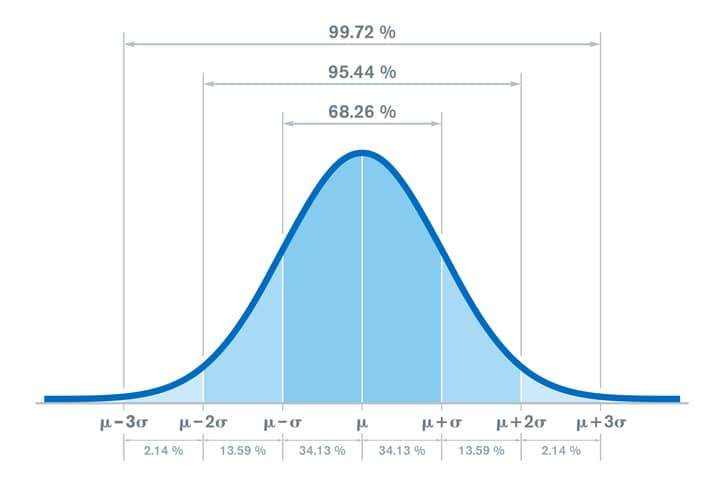

In [15]:
print(f"The percentage of people more than 2 standard deviations away from the average height is {percentage_outliers}%.")

The percentage of people more than 2 standard deviations away from the average height is 3.3357142857142854%.


find out what percentage of the population over 50 years old consume alcohol. ignore those where we have no alcohol consumption

In [16]:
merged_data = pd.merge(cardio_base, cardio_alco, on='id')
over_50 = merged_data[merged_data['age_years'] > 50]
over_50_alcohol_consumers = over_50[over_50['alco'] > 0]  # Assuming 'alcohol' > 0 means known alcohol consumption
percentage_over_50_alcohol_consumers = (len(over_50_alcohol_consumers) / len(over_50)) * 100
print(f"The percentage of the population over 50 years old that consumes alcohol is {percentage_over_50_alcohol_consumers}%.")

The percentage of the population over 50 years old that consumes alcohol is 4.908607691056028%.


**Smokers have higher blood pressure than non-smokers:**

Systolic Blood Pressure (ap_hi): p-value = 0.7368806768046336

Diastolic Blood Pressure (ap_lo): p-value = 0.624316601008065

Interpretation: Since both p-values are greater than 0.05, there is no statistically significant difference in either systolic or diastolic blood pressure between smokers and non-smokers at the 95% confidence level.

**Men have higher blood pressure than women:**

Systolic Blood Pressure: p-value = 0.12029169236848608

Diastolic Blood Pressure: p-value = 0.010735386494106791

Interpretation: The p-value for diastolic blood pressure is less than 0.05, indicating a statistically significant difference at the 95% confidence level, with men having higher diastolic blood pressure. However, for systolic blood pressure, the difference is not statistically significant.

**Smokers have higher cholesterol levels than non-smokers:**

p-value = 0.013250800800403608

Interpretation: The p-value is less than 0.05, indicating that there is a statistically significant difference in cholesterol levels between smokers and non-smokers at the 95% confidence level, with smokers having higher cholesterol levels.


**Smokers weigh less than non-smokers:**

p-value = 2.3936615856960592e-61

Interpretation: This extremely small p-value indicates a statistically significant difference in weight between smokers and non-smokers at the 95% confidence level, with smokers weighing less.

In [40]:
# ! pip install scipy
import scipy.stats as stats

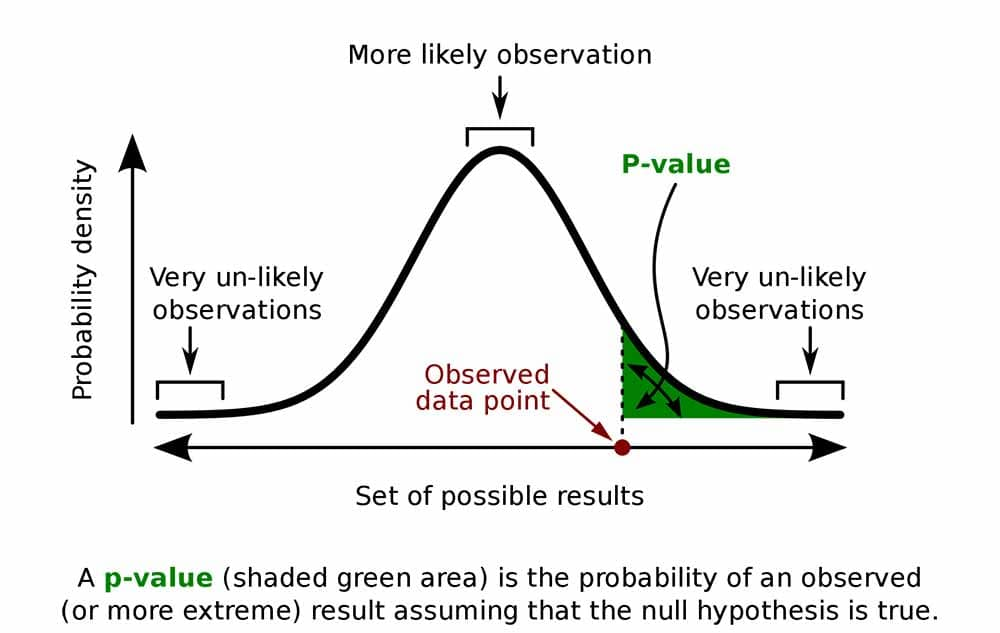

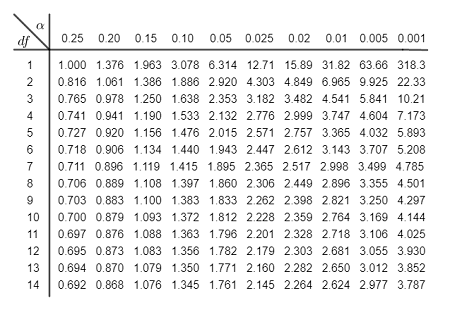

In [54]:
# Analysis 1: Blood pressure comparison between smokers and non-smokers
smokers_bp = merged_data[merged_data['smoke'] == 1][['ap_hi', 'ap_lo']]
non_smokers_bp = merged_data[merged_data['smoke'] == 0][['ap_hi', 'ap_lo']]

# Independent t-tests for systolic (ap_hi) and diastolic (ap_lo) blood pressure
t_stat_bp_hi, p_val_bp_hi = stats.ttest_ind(smokers_bp['ap_hi'], non_smokers_bp['ap_hi'])
t_stat_bp_lo, p_val_bp_lo = stats.ttest_ind(smokers_bp['ap_lo'], non_smokers_bp['ap_lo'])

# Analysis 2: Blood pressure comparison between men and women
men_bp = merged_data[merged_data['gender'] == 2][['ap_hi', 'ap_lo']]
women_bp = merged_data[merged_data['gender'] == 1][['ap_hi', 'ap_lo']]

t_stat_gender_hi, p_val_gender_hi = stats.ttest_ind(men_bp['ap_hi'], women_bp['ap_hi'])
t_stat_gender_lo, p_val_gender_lo = stats.ttest_ind(men_bp['ap_lo'], women_bp['ap_lo'])

# Analysis 3: Cholesterol comparison between smokers and non-smokers
smokers_cholesterol = merged_data[merged_data['smoke'] == 1]['cholesterol']
non_smokers_cholesterol = merged_data[merged_data['smoke'] == 0]['cholesterol']

t_stat_cholesterol, p_val_cholesterol = stats.ttest_ind(smokers_cholesterol, non_smokers_cholesterol)

# Analysis 4: Weight comparison between smokers and non-smokers
smokers_weight = merged_data[merged_data['smoke'] == 1]['weight']
non_smokers_weight = merged_data[merged_data['smoke'] == 0]['weight']

t_stat_weight, p_val_weight = stats.ttest_ind(smokers_weight, non_smokers_weight)

(p_val_bp_hi, p_val_bp_lo, p_val_gender_hi, p_val_gender_lo, p_val_cholesterol, p_val_weight)


(0.7368806768046336,
 0.624316601008065,
 0.12029169236848608,
 0.010735386494106791,
 0.013250800800403608,
 2.3936615856960592e-61)

In [49]:
print(smokers_bp)
print(non_smokers_bp)

       ap_hi  ap_lo
6        130     80
26       140     90
27       180     90
35       150    100
71       125     80
...      ...    ...
56829    140    100
56845    120     80
56886    130     80
56889    110     70
56893    120     80

[5039 rows x 2 columns]
       ap_hi  ap_lo
0        110     70
1        130     85
2        140     90
3        120     80
4        120     80
...      ...    ...
56898    130     90
56899    130     90
56900    120     80
56901    120     80
56902    140     80

[51864 rows x 2 columns]
Finished Analysis 1


In [53]:
print(t_stat_bp_hi)
print(t_stat_bp_lo)
print(p_val_bp_hi)
print(p_val_bp_lo)
print("Finished Analysis 1")

-0.3359886334251424
0.48974449338740494
0.7368806768046336
0.624316601008065
Finished Analysis 1


In [51]:
print(men_bp)
print(women_bp)

       ap_hi  ap_lo
2        140     90
4        120     80
6        130     80
10       140     90
11       120     60
...      ...    ...
56894    160     90
56896    140     90
56899    130     90
56900    120     80
56901    120     80

[19954 rows x 2 columns]
       ap_hi  ap_lo
0        110     70
1        130     85
3        120     80
5        130     90
7        140     90
...      ...    ...
56892    120     80
56895    130     70
56897    110     75
56898    130     90
56902    140     80

[36949 rows x 2 columns]


In [52]:
print(t_stat_bp_hi)
print(t_stat_bp_lo)
print(p_val_gender_hi)
print(p_val_gender_lo)
print("Finished Analysis 2")

-0.3359886334251424
0.48974449338740494
0.12029169236848608
0.010735386494106791
Finished Analysis 2
